In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv('placement.csv')

Text(0, 0.5, 'Package (in lpa)')

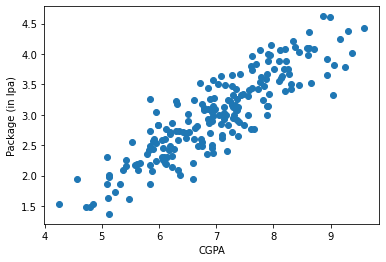

In [4]:
#Scatter plot of CGPA vs Package
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package (in lpa)')

In [12]:
# Split the dataset into input features (X) and target variable (y)
X = df.iloc[:, 0:1]
y = df.iloc[:, 1]

In [13]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [14]:
# Linear Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
#Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = lr.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.2884710931878175
MSE: 0.12129235313495527
RMSE: 0.34827051717731616
R2 Score: 0.780730147510384


Text(0, 0.5, 'Package (in lpa)')

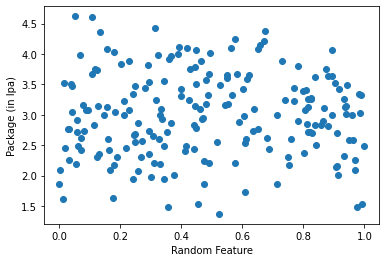

In [19]:
# Adding a random feature
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)
new_df1 = new_df1[['cgpa', 'random_feature', 'package']]

#  Scatter plot of Random Feature vs Package
plt.scatter(new_df1['random_feature'], new_df1['package'])
plt.xlabel('Random Feature')
plt.ylabel('Package (in lpa)')

In [20]:
# Train-test split for new dataset
X = new_df1.iloc[:, 0:2]
y = new_df1.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Linear Regression model on new dataset
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.7774340697220767


Text(0, 0.5, 'Package (in lpa)')

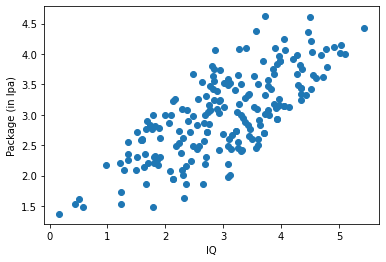

In [21]:
# Adding a new feature with random noise
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12, 12, 200) / 10)
new_df2 = new_df2[['cgpa', 'iq', 'package']]

# Scatter plot of IQ vs Package
plt.scatter(new_df2['iq'], new_df2['package'])
plt.xlabel('IQ')
plt.ylabel('Package (in lpa)')

In [22]:
# Train-test split for new dataset
X = new_df2.iloc[:, 0:2]
y = new_df2.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Linear Regression model on new dataset
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.8323439016352228


In [23]:
# Calculation of Adjusted R2 Score
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - ((1 - r2) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
print("Adjusted R2 Score:", adjusted_r2)

Adjusted R2 Score: 0.8232814098317213
